In [1]:
import os
import numpy as np 
import pandas as pd

In [2]:
X_train = pd.read_csv("data/ancestry_train.data", sep = " ", header=None).values
y_train = pd.read_csv("data/ancestry_train.solution", sep = " ", header=None).values

X_test = pd.read_csv("data/ancestry_test.data", sep = " ", header=None).values

In [3]:
X_train

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [4]:
np.round(y_train, 3)

array([[0.198, 0.75 , 0.052],
       [0.858, 0.142, 0.   ],
       [0.761, 0.237, 0.001],
       ...,
       [0.001, 0.183, 0.817],
       [0.016, 0.591, 0.393],
       [0.   , 0.007, 0.993]])

In [5]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 2, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 1, 1],
       [0, 0, 2, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# cost function

In [6]:
def cost(y_true, y_hat):
    mse = -np.log10(np.mean((y_true-y_hat)**2)+1e-5)
    return(mse)

# baseline

In [7]:
base = np.ones((y_train.shape[0], y_train.shape[1])) * (1/3)
cost(y_train, base)

0.8401067369385945

In [8]:
y_test = np.ones((X_test.shape[0], y_train.shape[1])) * (1/3)

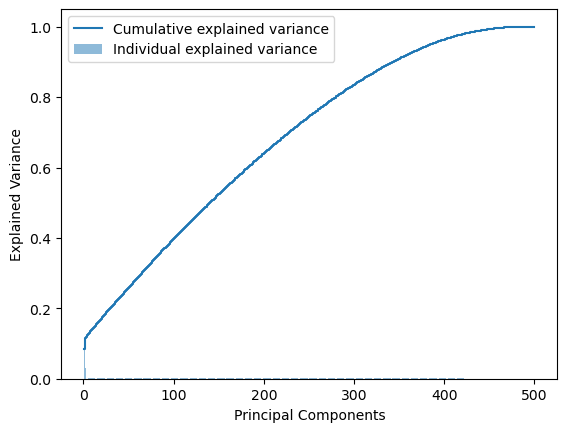

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have your data in X
pca = PCA()
pca.fit(X_train)

explained_variances = pca.explained_variance_ratio_
cumulative_variances = np.cumsum(explained_variances)

# Create a bar plot for explained variances
plt.bar(range(1, len(explained_variances) + 1), explained_variances, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variances) + 1), cumulative_variances, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.legend()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,make_scorer,r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [12]:
from sklearn.neural_network import MLPRegressor

In [30]:
default_pipeline = Pipeline([
    ('pca', PCA(n_components = 10)),
    ('model',MLPRegressor())
    ])
    

params = [
     {
          "pca__n_components":[3,5,7,10],
          "model":[MLPRegressor()],
          "model__alpha":[1e-2],
          "model__hidden_layer_sizes":[(500,),(200,200,)],
          #"model__learning_rate":['adaptive'],
          "model__activation":['relu']
     }
]

In [31]:
g_s = GridSearchCV(default_pipeline, params,cv=KFold(n_splits=10,shuffle = True, random_state = 42),n_jobs=-1, scoring=('neg_root_mean_squared_error'),verbose=10,
                    return_train_score=False)
g_s.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(n_components=10)),
                                       ('model', MLPRegressor())]),
             n_jobs=-1,
             param_grid=[{'model': [MLPRegressor(activation='tanh', alpha=0.01,
                                                 hidden_layer_sizes=(200,
                                                                     200))],
                          'model__activation': ['tanh'], 'model__alpha': [0.01],
                          'model__hidden_layer_sizes': [(500,), (200, 200)],
                          'pca__n_components': [3, 5, 7, 10]}],
             scoring='neg_root_mean_squared_error', verbose=10)

In [32]:
df_g = pd.DataFrame(g_s.cv_results_)
sorted_g = df_g.sort_values(by='rank_test_score', ascending=True)

In [33]:
sorted_g[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__activation,param_model__alpha,param_model__hidden_layer_sizes,param_pca__n_components,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
4,85.491878,4.622278,0.138661,0.059084,"MLPRegressor(activation='tanh', alpha=0.01, hi...",tanh,0.01,"(200, 200)",3,"{'model': MLPRegressor(activation='tanh', alph...",...,-0.049009,-0.048114,-0.047833,-0.048556,-0.050281,-0.047671,-0.047481,-0.048716,0.000951,1
5,91.283523,9.868453,0.125425,0.044784,"MLPRegressor(activation='tanh', alpha=0.01, hi...",tanh,0.01,"(200, 200)",5,"{'model': MLPRegressor(activation='tanh', alph...",...,-0.051319,-0.048939,-0.048646,-0.048970,-0.049440,-0.050150,-0.048729,-0.049215,0.000883,2
7,71.706033,6.003780,0.050866,0.026604,"MLPRegressor(activation='tanh', alpha=0.01, hi...",tanh,0.01,"(200, 200)",10,"{'model': MLPRegressor(activation='tanh', alph...",...,-0.050341,-0.048725,-0.049069,-0.047748,-0.051759,-0.048059,-0.048734,-0.049400,0.001241,3
6,81.268193,5.239185,0.107888,0.041298,"MLPRegressor(activation='tanh', alpha=0.01, hi...",tanh,0.01,"(200, 200)",7,"{'model': MLPRegressor(activation='tanh', alph...",...,-0.048944,-0.048237,-0.050465,-0.048521,-0.050518,-0.048973,-0.050654,-0.049460,0.001049,4
1,22.260339,3.092329,0.108650,0.030222,"MLPRegressor(activation='tanh', alpha=0.01, hi...",tanh,0.01,"(500,)",5,"{'model': MLPRegressor(activation='tanh', alph...",...,-0.051094,-0.050879,-0.050300,-0.050305,-0.050962,-0.049697,-0.052837,-0.050827,0.000866,5
2,21.546839,3.813817,0.115728,0.031701,"MLPRegressor(activation='tanh', alpha=0.01, hi...",tanh,0.01,"(500,)",7,"{'model': MLPRegressor(activation='tanh', alph...",...,-0.050917,-0.050770,-0.051100,-0.051032,-0.053751,-0.050197,-0.050811,-0.051054,0.001185,6
0,18.891824,4.612746,0.097115,0.004301,"MLPRegressor(activation='tanh', alpha=0.01, hi...",tanh,0.01,"(500,)",3,"{'model': MLPRegressor(activation='tanh', alph...",...,-0.051893,-0.051130,-0.049923,-0.049855,-0.052317,-0.050555,-0.052245,-0.051164,0.001149,7
3,25.596983,5.212607,0.127117,0.039870,"MLPRegressor(activation='tanh', alpha=0.01, hi...",tanh,0.01,"(500,)",10,"{'model': MLPRegressor(activation='tanh', alph...",...,-0.052689,-0.053870,-0.050134,-0.050451,-0.052631,-0.050693,-0.050565,-0.051670,0.001354,8


In [25]:
y_test = g_s.predict(X_test)

In [36]:
clf = MLPRegressor(alpha = 0.001  ,hidden_layer_sizes=(100, 100), activation = 'relu')

model_fit = clf.fit(X_train,y_train)
y_test = model_fit.predict(X_test)
# gets 2.5

In [21]:
preds

array([[-0.03675673,  0.54508853,  0.49804277],
       [ 0.99231634,  0.02373454,  0.00384636],
       [ 0.00686609,  0.02395507,  0.97355681],
       ...,
       [ 0.00313084,  0.53197244,  0.47897866],
       [-0.00443281,  0.03280723,  0.97884087],
       [ 0.02975541,  0.06218708,  0.88913742]])

In [15]:
from sklearn.ensemble import RandomForestRegressor
default_pipeline = Pipeline([
    ('model',RandomForestRegressor(oob_score = True))
    ])


params = [
     {
          "model":[RandomForestRegressor()],
          "model__max_depth":[25,50,100],
          "model__n_estimators":[100],#,200],
          "model__max_features":["sqrt","log2",None]
     }
]

In [ ]:
g_s = GridSearchCV(default_pipeline, params,cv=KFold(n_splits=10,shuffle = True, random_state = 42),n_jobs=-1, scoring=('neg_root_mean_squared_error'),verbose=10,
                    return_train_score=False)
g_s.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [13]:
df_g = pd.DataFrame(g_s.cv_results_)
sorted_g = df_g.sort_values(by='rank_test_score', ascending=True)

In [14]:
sorted_g[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__max_depth,param_model__max_features,param_model__n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,40.680073,1.132832,0.481960,0.129552,"RandomForestRegressor(max_depth=25, max_featur...",25,sqrt,100,"{'model': RandomForestRegressor(max_depth=25, ...",-0.088674,...,-0.089256,-0.089776,-0.089521,-0.088795,-0.089302,-0.089082,-0.090105,-0.089360,0.000418,1
5,41.820409,0.913069,0.199867,0.039290,"RandomForestRegressor(max_depth=25, max_featur...",500,sqrt,100,"{'model': RandomForestRegressor(max_depth=25, ...",-0.089006,...,-0.088726,-0.090411,-0.089244,-0.089186,-0.089714,-0.090211,-0.089795,-0.089565,0.000500,2
3,47.093303,1.601974,0.437737,0.029548,"RandomForestRegressor(max_depth=25, max_featur...",100,sqrt,100,"{'model': RandomForestRegressor(max_depth=25, ...",-0.089410,...,-0.088867,-0.090429,-0.089408,-0.089791,-0.089469,-0.089744,-0.090098,-0.089633,0.000408,3
4,47.009084,1.688464,0.367823,0.103534,"RandomForestRegressor(max_depth=25, max_featur...",250,sqrt,100,"{'model': RandomForestRegressor(max_depth=25, ...",-0.089436,...,-0.088986,-0.090395,-0.089638,-0.089561,-0.090030,-0.089851,-0.090104,-0.089705,0.000382,4
2,46.524879,0.676281,0.723322,0.277089,"RandomForestRegressor(max_depth=25, max_featur...",50,sqrt,100,"{'model': RandomForestRegressor(max_depth=25, ...",-0.089237,...,-0.088913,-0.090221,-0.089650,-0.089478,-0.089756,-0.089968,-0.090787,-0.089778,0.000495,5
0,28.926160,1.183155,0.347488,0.123238,"RandomForestRegressor(max_depth=25, max_featur...",15,sqrt,100,"{'model': RandomForestRegressor(max_depth=25, ...",-0.089198,...,-0.088484,-0.090262,-0.090226,-0.089388,-0.090413,-0.089890,-0.090564,-0.089854,0.000650,6


In [ ]:
clf = RandomForestRegressor(alpha = 0.001  ,hidden_layer_sizes=(100, 100), activation = 'relu')

model_fit = clf.fit(X_train,y_train)
y_test = model_fit.predict(X_test)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
default_pipeline = Pipeline([
    ('pca', PCA(n_components = 10)),
    ('model',RandomForestRegressor(oob_score = True))
    ])


params = [
     {
          "pca__n_components":[3,5,7], 
          "model":[RandomForestRegressor()],
          "model__max_depth":[10,25,50],
          "model__n_estimators":[100],#,200],
          "model__max_features":["sqrt"],
          "model__ccp_alpha":[1e-5,1e-3,1e-1,1e1]
     }
]

In [ ]:
g_s = GridSearchCV(default_pipeline, params,cv=KFold(n_splits=10,shuffle = True, random_state = 42),n_jobs=-1, scoring=('neg_root_mean_squared_error'),verbose=10,
                    return_train_score=False)
g_s.fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [14]:
df_g = pd.DataFrame(g_s.cv_results_)
sorted_g = df_g.sort_values(by='rank_test_score', ascending=True)

In [15]:
sorted_g[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__max_depth,param_model__max_features,param_model__n_estimators,param_pca__n_components,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,18.071546,0.336903,0.090244,0.015131,"RandomForestRegressor(max_depth=10, max_featur...",10,sqrt,100,5,"{'model': RandomForestRegressor(max_depth=10, ...",...,-0.048302,-0.047448,-0.046855,-0.046984,-0.048526,-0.046736,-0.046594,-0.047315,0.000635,1
7,44.028209,2.326862,0.271401,0.032313,"RandomForestRegressor(max_depth=10, max_featur...",25,sqrt,100,10,"{'model': RandomForestRegressor(max_depth=10, ...",...,-0.048391,-0.047625,-0.047233,-0.047163,-0.048721,-0.047177,-0.047022,-0.047611,0.000560,2
12,46.042002,2.168998,0.257525,0.029108,"RandomForestRegressor(max_depth=10, max_featur...",50,sqrt,100,10,"{'model': RandomForestRegressor(max_depth=10, ...",...,-0.048519,-0.047839,-0.047565,-0.047353,-0.049045,-0.047266,-0.046694,-0.047700,0.000659,3
17,53.206382,1.691938,0.404729,0.088326,"RandomForestRegressor(max_depth=10, max_featur...",100,sqrt,100,10,"{'model': RandomForestRegressor(max_depth=10, ...",...,-0.048851,-0.047688,-0.047311,-0.047382,-0.048766,-0.047337,-0.046982,-0.047714,0.000616,4
11,31.122281,1.255583,0.235863,0.010101,"RandomForestRegressor(max_depth=10, max_featur...",50,sqrt,100,5,"{'model': RandomForestRegressor(max_depth=10, ...",...,-0.049067,-0.048052,-0.047665,-0.047246,-0.049061,-0.047336,-0.047029,-0.047943,0.000711,5
6,31.377970,2.261202,0.249887,0.040350,"RandomForestRegressor(max_depth=10, max_featur...",25,sqrt,100,5,"{'model': RandomForestRegressor(max_depth=10, ...",...,-0.048942,-0.048140,-0.047332,-0.047294,-0.049380,-0.047465,-0.047349,-0.047966,0.000691,6
16,32.625564,1.177819,0.305786,0.027972,"RandomForestRegressor(max_depth=10, max_featur...",100,sqrt,100,5,"{'model': RandomForestRegressor(max_depth=10, ...",...,-0.048696,-0.048383,-0.047730,-0.047854,-0.049223,-0.047334,-0.047392,-0.048048,0.000601,7
2,22.040118,0.651982,0.097563,0.027313,"RandomForestRegressor(max_depth=10, max_featur...",10,sqrt,100,10,"{'model': RandomForestRegressor(max_depth=10, ...",...,-0.050817,-0.050503,-0.049821,-0.049740,-0.051372,-0.049277,-0.050663,-0.049919,0.000853,8
18,175.710129,3.822538,0.538356,0.322963,"RandomForestRegressor(max_depth=10, max_featur...",100,sqrt,100,100,"{'model': RandomForestRegressor(max_depth=10, ...",...,-0.071930,-0.068825,-0.066332,-0.071300,-0.070107,-0.070057,-0.066885,-0.069782,0.001861,9
13,171.834552,4.263878,0.353115,0.068339,"RandomForestRegressor(max_depth=10, max_featur...",50,sqrt,100,100,"{'model': RandomForestRegressor(max_depth=10, ...",...,-0.071558,-0.070237,-0.071173,-0.069270,-0.075332,-0.069020,-0.072184,-0.070891,0.002372,10


In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA

default_pipeline = Pipeline([
    #('pca', PCA(n_components = 10)),
    ('model',GradientBoostingRegressor())
    ])


params = [
     {
          #"pca__n_components":[3,5,7,10], 
          "model":[GradientBoostingRegressor()],
     }
]

In [16]:
g_s = GridSearchCV(default_pipeline, params,cv=KFold(n_splits=10,shuffle = True, random_state = 42),n_jobs=-1, scoring=('neg_root_mean_squared_error'),verbose=10,
                    return_train_score=False)
g_s.fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yaman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yaman\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\yaman\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 437, in fit
    y = column_or_1d(y, warn=True)
  File "C:\Users\yaman\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1202, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (36000, 3) instead.


In [ ]:
df_g = pd.DataFrame(g_s.cv_results_)
sorted_g = df_g.sort_values(by='rank_test_score', ascending=True)

In [ ]:
sorted_g[:10]

# save and zip the file

In [16]:
y_test = g_s.predict(X_test)

In [26]:
pd.DataFrame(y_test).to_csv(f"predictions.csv", sep = " ", header = None, index = None)
os.system("zip -r predictions.zip predictions.csv")

0